<a href="https://colab.research.google.com/github/OJShearer/Learning/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade xlrd

In [1]:
import pandas as pd
data = pd.read_excel('https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true')

In [2]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()
# 9994  total
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
# unique values exist per column! (CARDINALITY)
for name in data.columns:
  print(name , end=" ")
  print(data[name].value_counts())
# too bulky to analyze, we just need to know per column 
# a COUNT of unique values!

Row ID 1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: Row ID, Length: 9994, dtype: int64
Order ID CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
Order Date 2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: Order Date, Length: 1237, dtype: int64
Ship Date 2015-12-16    35
2017-09-26    34
2017-12-06    32
2017-11-21    32
2017-09-06    30
              ..
2014-03-04     1
2017-02-11     1
2016-08-07     1
2017-04-08     1
2015-06-18     1
Name: Ship Date, Length: 1334, dtype: int64
Ship Mode Standard Class    5968
Second Class      1945
First Class       1

In [5]:
# CARDINALITY
for name in data.columns:
  print(name , end=" ")
  # Aggregate to view smaller but more readable data!
  print(data[name].value_counts().count())

Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [58]:
# DISCRETE-> 1,2,3,4 -> only 2
# Continuous-> all the number between 1 and 4-> infinite

In [6]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
data['Order Date']
# multiple date entries in the record!

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [8]:
data['Order Date'].min(), data['Order Date'].max()
# OBSERVATION-> Jan1,2 of 2014 is missing!
# 31st dec of 2017-> missing NOT null!

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
df = data.groupby('Order Date')
df['Order Date'].value_counts().count()
# ONLY 1237 entries for all the days of 2014 to 2017!

1237

In [ ]:
# 4 years X 365.25 days = 1461 (expected)
# reality-> 1237 entries!
# Missing values= 1461 - 1237 = 224

In [10]:
df = data.loc[:,['Order Date', 'Sales']]
df.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [11]:
df = df.groupby('Order Date').sum()
df.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [12]:
df.tail()

,Sales
Order Date,
2017-12-26,814.5940
2017-12-27,177.6360
2017-12-28,1657.3508
2017-12-29,2915.5340
2017-12-30,713.7900


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2014-01-03 to 2017-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1237 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [ ]:
# MISSING values-> GROUP by our data by MONTH instead of days!
# SALES-> is SUM a justified aggregation behavior?
# DISTRIBUTION of the days is inconsistent!
# SUM-> will imbalance the data
# Feb-> 28 or 29 days X1.01 -> momentum of sales was higher here
# jan-> 31 X 1
# mar-> 30 X 1
# MEAN would be a better operation

In [14]:
monthly_data = df.resample('MS').mean()
monthly_data.head()

,Sales
Order Date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679


In [15]:
monthly_data.tail()

,Sales
Order Date,
2017-08-01,2337.810667
2017-09-01,3138.094714
2017-10-01,2777.747257
2017-11-01,3948.260833
2017-12-01,2890.666166


In [16]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


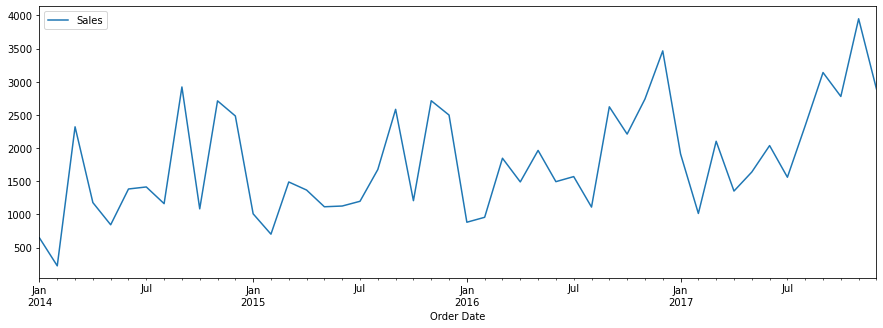

In [17]:
import matplotlib.pyplot as plt
monthly_data.plot(figsize=(15,5))
plt.show()

In [18]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


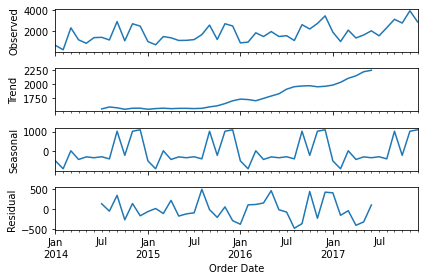

In [19]:
decomposition.plot()
plt.show()

In [ ]:
# ARIMA - Auto Regression, Integration, Moving Averages
# ARIMAX - instead of taking all 3 algos on all 3 decompositions,
# we play with all possible permutations 
# we need to generate all possible values of 
# ARIMA with T,S,R
# Season or no season
# season-> known repeatation with respect to TIME
# no season-> no known pattern
# our case-> SEASON-> 12 months
# (S,AR,I,MA) X (T,S,R)
# S will always be constant-> 12
# (12, AR, I, MA) X (p, d, q)
# 12.   0.  0. 0     0. 0.  0 = nothing
# 12.   0.  0. 1.    0   0.  1 = Moving avgs on residue

In [ ]:
# ALL POSSIBLE combinations-> GRID SEARCH
# exhausitvely generate all options and pick the best one
# finite problems

# infinite combinations-> best learning rate?
# 0.0001, 0.0011, 0.00015... no best possible answer!
# 100s of RANDOM combination-> select the most workable
# RANDOMIZED search
# incomplete, n-complete, 

# Bayesian search
# Probabilistic search
# combinations are generated such that next generation
# is *probably* better than the previous generation

# HYPERPARAMETERs

In [20]:
import itertools
p = d = q = range(0,2) # VALUE generators between [0,1] 
pdq = list(itertools.product(p,d,q)) # ALL possible combinations
print(pdq)
# below is the TRUTH table

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [21]:
seasons = 12
seasonal_pdq = [(x[0],x[1],x[2], seasons) for x in pdq] 
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
# (1, 0, 1) X (0, 1, 0, 12) = AR with MA on S
# AR. I. MA.   T. S. R. (12 months)
# (0, 1, 0) X (1, 0, 1, 12) = I with T and R
# Y or Loss Function= AIC and BIC-> losses (minimize)

In [22]:
# BEST possible values for P,D,Q and seasonal P,D,Q
# for lowest possible values of AIC 
best_score = 9999
best_pdq= (0,0,0)
best_spdq = (0,0,0)
for x1 in pdq:
  for x2 in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(monthly_data, 
                                        order=x1, 
                                        seasonal_order=x2, 
                                        enforce_stationarity=False)
      # calculate the metric- AIC
      prediction = model.fit()
      # fitting-> training the model, scoring-> testing the model
      # compare predictions against the known results
      # it helps us calculate LOSS
      print(x1, end= " X ")
      print(x2, end=" = ")
      print(prediction.aic)

      if(prediction.aic < best_score):
        best_score = prediction.aic
        best_pdq = x1
        best_spdq = x2
      
    except Exception as ex:
      print(ex)
      continue

(0, 0, 0) X (0, 0, 0, 12) = 849.2964734613763
(0, 0, 0) X (0, 0, 1, 12) = 604.106325307762
(0, 0, 0) X (0, 1, 0, 12) = 542.5524077991603
maxlag should be < nobs
(0, 0, 0) X (1, 0, 0, 12) = 556.4030539681389


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


(0, 0, 0) X (1, 0, 1, 12) = 536.1242565920387
(0, 0, 0) X (1, 1, 0, 12) = 379.31311116746053
maxlag should be < nobs
(0, 0, 1) X (0, 0, 0, 12) = 800.9546614982925
(0, 0, 1) X (0, 0, 1, 12) = 567.5106101390721
(0, 0, 1) X (0, 1, 0, 12) = 528.8097917452064
maxlag should be < nobs
(0, 0, 1) X (1, 0, 0, 12) = 558.3100438820165


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 0, 1) X (1, 0, 1, 12) = 520.4853141479043
(0, 0, 1) X (1, 1, 0, 12) = 378.64439838327496
maxlag should be < nobs
(0, 1, 0) X (0, 0, 0, 12) = 761.9496656386243
(0, 1, 0) X (0, 0, 1, 12) = 547.9170005973962
(0, 1, 0) X (0, 1, 0, 12) = 545.4367571124947
maxlag should be < nobs
(0, 1, 0) X (1, 0, 0, 12) = 549.6307002149172
(0, 1, 0) X (1, 0, 1, 12) = 527.0519155276849
(0, 1, 0) X (1, 1, 0, 12) = 367.6372959140954
maxlag should be < nobs
(0, 1, 1) X (0, 0, 0, 12) = 726.882222009084
(0, 1, 1) X (0, 0, 1, 12) = 523.8494861329353
(0, 1, 1) X (0, 1, 0, 12) = 506.8154877701793
maxlag should be < nobs
(0, 1, 1) X (1, 0, 0, 12) = 539.5587096435789


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 1) X (1, 0, 1, 12) = 500.73896946299305
(0, 1, 1) X (1, 1, 0, 12) = 355.76300482779016
maxlag should be < nobs
(1, 0, 0) X (0, 0, 0, 12) = 777.9055059640486
(1, 0, 0) X (0, 0, 1, 12) = 563.6435518023713
(1, 0, 0) X (0, 1, 0, 12) = 543.6595443248249
maxlag should be < nobs
(1, 0, 0) X (1, 0, 0, 12) = 548.4301230014523
(1, 0, 0) X (1, 0, 1, 12) = 536.7833280419143
(1, 0, 0) X (1, 1, 0, 12) = 362.40331406166104
maxlag should be < nobs
(1, 0, 1) X (0, 0, 0, 12) = 745.222081346705
(1, 0, 1) X (0, 0, 1, 12) = 536.9784646196272
(1, 0, 1) X (0, 1, 0, 12) = 529.4623072733407
maxlag should be < nobs


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1) X (1, 0, 0, 12) = 536.5901932189885


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 0, 1) X (1, 0, 1, 12) = 515.4867477812602
(1, 0, 1) X (1, 1, 0, 12) = 357.12810067948
maxlag should be < nobs
(1, 1, 0) X (0, 0, 0, 12) = 753.5151712720058
(1, 1, 0) X (0, 0, 1, 12) = 543.1034054132418
(1, 1, 0) X (0, 1, 0, 12) = 535.7885418383611
maxlag should be < nobs
(1, 1, 0) X (1, 0, 0, 12) = 528.5408441618994


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 0) X (1, 0, 1, 12) = 525.2929645303409
(1, 1, 0) X (1, 1, 0, 12) = 347.5488382215406
maxlag should be < nobs
(1, 1, 1) X (0, 0, 0, 12) = 727.99637358224
(1, 1, 1) X (0, 0, 1, 12) = 525.0016883284237
(1, 1, 1) X (0, 1, 0, 12) = 508.28545011031724
maxlag should be < nobs
(1, 1, 1) X (1, 0, 0, 12) = 524.7930009104027


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) X (1, 0, 1, 12) = 502.72872274093925
(1, 1, 1) X (1, 1, 0, 12) = 343.12698750913
maxlag should be < nobs


In [23]:
#BEST MODEL
print('Best Model Award Goes To: ')
print(best_pdq , end =" X ")
print(best_spdq)
print('AIC Score for this model is ', end= " ")
print(best_score)

Best Model Award Goes To: 
(1, 1, 1) X (1, 1, 0, 12)
AIC Score for this model is  343.12698750913


In [24]:
model = sm.tsa.statespace.SARIMAX(monthly_data, order=best_pdq, seasonal_order= best_spdq, enforce_stationarity=False)

model2 = sm.tsa.statespace.SARIMAX(monthly_data, order=(0, 1, 0), seasonal_order= (1, 0, 1, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [25]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred2 = results2.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

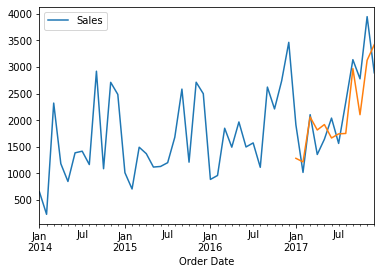

In [34]:
real_values = monthly_data['2014':].plot(label='actual')
# y axis of real data
pred.predicted_mean.plot(ax=real_values, label='One-Step-Ahead Forecast')

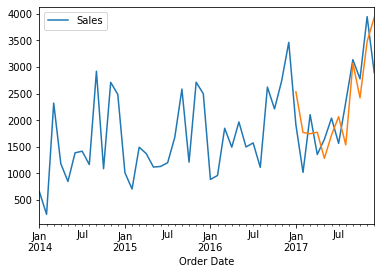

In [35]:
real_values = monthly_data['2014':].plot(label='actual')
# y axis of real data
pred2.predicted_mean.plot(ax=real_values, label='One-Step-Ahead Forecast')